In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data=pd.read_csv('/Users/wudailing/machinelearning-datasets/blFriday/train.csv') 

In [91]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [110]:
data=data.fillna(0)

<h1>探索性資料分析</h1>

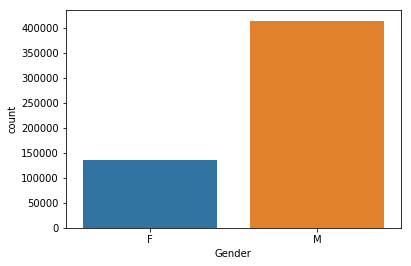

In [93]:
sns.countplot(data['Gender'])

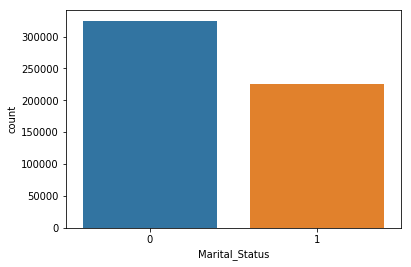

In [94]:
sns.countplot(data['Marital_Status'])

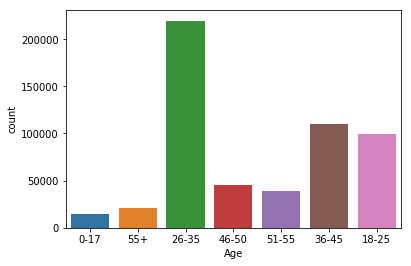

In [95]:
sns.countplot(data['Age'])

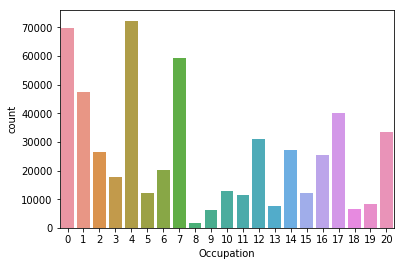

In [96]:
sns.countplot(data['Occupation'])

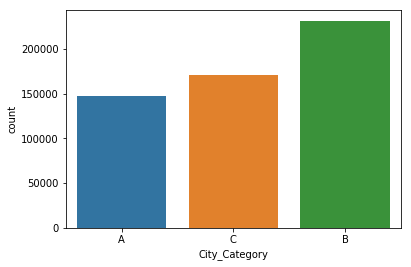

In [97]:
sns.countplot(data['City_Category'])

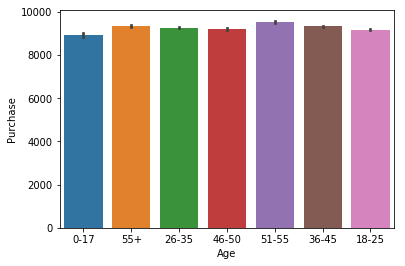

In [98]:
sns.barplot(data['Age'],data['Purchase'])

<h1>處理類別變數</h1>

In [100]:
category_variable=['Gender','Age','City_Category','Stay_In_Current_City_Years','Product_ID']
data_Encoded=pd.DataFrame()
encInfo={}
for category in category_variable:
    factorized=pd.factorize(data[category])
    print(factorized)
    data[category]=factorized[0]
    encInfo[category]=factorized[1]

(array([0, 0, 0, ..., 0, 0, 0]), Index(['F', 'M'], dtype='object'))
(array([0, 0, 0, ..., 2, 1, 3]), Index(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype='object'))
(array([0, 0, 0, ..., 2, 1, 2]), Index(['A', 'C', 'B'], dtype='object'))
(array([0, 0, 0, ..., 1, 0, 1]), Index(['2', '4+', '3', '1', '0'], dtype='object'))
(array([   0,    1,    2, ..., 3626, 3626, 3629]), Index(['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442',
       'P00193542', 'P00184942', 'P00346142', 'P0097242', 'P00274942',
       ...
       'P00295642', 'P00091742', 'P00350742', 'P00060842', 'P00057842',
       'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853'],
      dtype='object', length=3631))


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null int64
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(10)
memory usage: 50.4 MB


<h1>model training </h1>

In [112]:
x=data.iloc[:,:-1]
target=data[['Purchase',]]
print(x.shape)
print(target.shape)

(550068, 11)
(550068, 1)


In [113]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,target,test_size=0.3)

In [119]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor()
rfmodel.fit(train_x,train_y)
pred_test_y=rfmodel.predict(test_x)
pred_train_y=rfmodel.predict(train_x)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


<h1>model evaluation</h1>

In [123]:
from sklearn.metrics import r2_score
print('測試集r2:',r2_score(test_y,pred_test_y))

測試集r2: 0.6748084610211635


In [121]:
print('訓練集r2:', r2_score(train_y,pred_train_y))

訓練集r2: 0.9427484542158822
